<a href="https://colab.research.google.com/github/Viny2030/colabs/blob/main/Lazy_Frames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **<font color="#07a8ed">API lazy VS API eager**

In [1]:
import polars as pl

In [2]:
import polars as col

In [6]:
%%time
casas = pl.read_csv("https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv")
casas

CPU times: user 16.8 ms, sys: 4.64 ms, total: 21.5 ms
Wall time: 255 ms


,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [8]:
casas.columns

['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

In [10]:
casas_filtrado = casas.filter(pl.col('antiguedad')>10)
casas_filtrado

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
5,120000,0.68,31,14000,1152,22,4,1.0,8,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
6,153000,0.4,33,23300,2752,51,4,1.5,8,"""hot water/steam""","""oil""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1722,249000,0.43,41,45800,2426,61,4,2.0,7,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [11]:
casas_agregado = casas_filtrado.group_by('precio').agg(media_precios=pl.col('precio').mean()
)
casas_agregado

precio,media_precios
i64,f64
118000,118000.0
240000,240000.0
114900,114900.0
85000,85000.0
205100,205100.0
…,…
647000,647000.0
236000,236000.0
297900,297900.0



# **<font color="#07a8ed">Optimizaciones realizadas con el API Lazy**



In [12]:
%%time
query = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .filter(pl.col('antiguedad')>10)
    .group_by('precio').agg(media_precio=pl.col('precio').mean()
    )
)
casas_agregado = query.collect()

CPU times: user 27.2 ms, sys: 18.1 ms, total: 45.3 ms
Wall time: 335 ms



# **<font color="#07a8ed">Cuando usar Lazy o Eager**


In [13]:
casas_agregado

precio,media_precio
i64,f64
45000,45000.0
102500,102500.0
107400,107400.0
184000,184000.0
320000,320000.0
…,…
600000,600000.0
105500,105500.0
178000,178000.0


In [14]:
print(query.explain(streaming=True))

STREAMING:
  AGGREGATE
  	[col("precio").mean().alias("media_precio")] BY [col("precio")] FROM
    Csv SCAN [https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv]
    PROJECT 2/16 COLUMNS
    SELECTION: [(col("antiguedad")) > (10)]



# **<font color="#07a8ed">Uso de la consulta Lazy a partir de la lectura de un archivo**

In [25]:

query_2 = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .filter(pl.col('universitarios') > 40)  # Move filter before select
    .select(
        pl.col('precio_terreno').mean().over('precio_terreno')
    )
)

print(query_2.explain(streaming=True))

 SELECT [col("precio_terreno").mean().over([col("precio_terreno")])] FROM
  STREAMING:
    Csv SCAN [https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv]
    PROJECT 2/16 COLUMNS
    SELECTION: [(col("universitarios")) > (40)]


##En esta consulta le decimos a Polars que queremos:

##Cargar datos desde el archivo csv
##Realizar filtro univeristarios mayores a 40
##convertir la columna precio_terreno en la media
##La consulta lazy no se ejecutará en este momento a menos que le apliquemos un .collect() .

In [26]:
query_2.collect()

precio_terreno
f64
22300.0
7300.0
18700.0
15000.0
23300.0
…
24200.0
36200.0
20400.0



# **<font color="#07a8ed">Uso de la API lazy desde un DataFrame**

###Una forma alternativa de acceder a la API lazy es llamar a .lazy en un DataFrame que ya se ha creado en la memoria.

###Al llamar a .lazy convertimos el DataFrame en un LazyFrame.

In [27]:
df = pl.DataFrame(
    {
        'id': [1, 2, 3],
        'nombre': ['Rosa', 'Ana', 'Pedro']
    }
)

df_lazy = df.lazy()

In [28]:
type(df_lazy)

polars.lazyframe.frame.LazyFrame

In [29]:
df_lazy.collect()

id,nombre
i64,str
1,"""Rosa"""
2,"""Ana"""
3,"""Pedro"""



# **<font color="#07a8ed">Schema**

###El esquema de un DataFrame o un LazyFrame establece los nombres de las columnas y sus tipos de datos. Si recordamos podemos ver el esquema de un DataFrame o un LazyFrame con el método .schema.

In [30]:
df.schema

Schema([('id', Int64), ('nombre', String)])

In [31]:
df_lazy.schema

<ipython-input-31-d20a04ec1c64>:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  df_lazy.schema


Schema([('id', Int64), ('nombre', String)])


# **<font color="#07a8ed">Comprobación de tipos de datos en la API lazy**

##El esquema juega un papel importante en la API lazy.

##Una ventaja de la API lazy es que Polars comprobará el esquema antes de procesar cualquier dato. Esta verificación ocurre cuando ejecutamos nuestra consulta lazy.

##Vemos cómo funciona esto en el siguiente ejemplo donde llamamos a la expresión .round en la columna id del DataFrame que previamente hemos creado.El esquema juega un papel importante en la API lazy.

##Una ventaja de la API lazy es que Polars comprobará el esquema antes de procesar cualquier dato. Esta verificación ocurre cuando ejecutamos nuestra consulta lazy.

##Vemos cómo funciona esto en el siguiente ejemplo donde llamamos a la expresión .round en la columna id del DataFrame que previamente hemos creado.

In [33]:
df_lazy.with_columns(pl.col('id').round(0)).collect()

id,nombre
i64,str
1,"""Rosa"""
2,"""Ana"""
3,"""Pedro"""


###Los que ha sucedido es que la expresión .round solo es válida para columnas de tipo float. Llamar a .round en una columna de números enteros significa que la operación generará un error de tipo InvalidOperationError cuando evaluemos la consulta con collect. Esta verificación de esquema ocurre antes de que se procesen los datos cuando llamamos a collect.


# **<font color="#07a8ed">Manejo de operaciones no disponibles en la API lazy**

In [34]:
casas.columns

['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

In [50]:
lazy_eager_query = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .with_columns(
        pl.col("antiguedad").cast(pl.Int64) # Convert 'antiguedad' to Int64
    )
    .collect()
    .pivot(
        index='antiguedad',
        columns='calefaccion',
        values='habitaciones',
        aggregate_function='mean'
    )
    .lazy()
)



<ipython-input-50-e9c06c65d651>:2: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')


In [52]:
print(lazy_eager_query.collect())

shape: (136, 4)
┌────────────┬──────────┬─────────────────┬──────────┐
│ antiguedad ┆ electric ┆ hot water/steam ┆ hot air  │
│ ---        ┆ ---      ┆ ---             ┆ ---      │
│ i64        ┆ f64      ┆ f64             ┆ f64      │
╞════════════╪══════════╪═════════════════╪══════════╡
│ 42         ┆ 5.0      ┆ 7.0             ┆ 6.5      │
│ 0          ┆ null     ┆ 7.0             ┆ 8.765432 │
│ 133        ┆ null     ┆ 9.5             ┆ null     │
│ 13         ┆ 6.666667 ┆ 8.75            ┆ 7.068966 │
│ 31         ┆ null     ┆ 7.5             ┆ 7.076923 │
│ …          ┆ …        ┆ …               ┆ …        │
│ 155        ┆ null     ┆ 3.0             ┆ null     │
│ 149        ┆ null     ┆ null            ┆ 8.0      │
│ 106        ┆ null     ┆ null            ┆ 7.0      │
│ 176        ┆ null     ┆ 12.0            ┆ null     │
│ 86         ┆ null     ┆ null            ┆ 6.0      │
└────────────┴──────────┴─────────────────┴──────────┘



# **<font color="#07a8ed">Pan de ejecucion de una consulta en la  API lazy**

# Plan de consulta
#Para cualquier consulta lazy, Polars tiene ambos:

#Un plan no optimizado: este contiene el conjunto de pasos en código qu ele proporcionamos.
#Un plan optimizado: que contiene cambios realizados por el optimizador de consultas


In [60]:
casas.columns

['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

In [77]:

query = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .filter(pl.col('antiguedad') > 10)
    .group_by('precio')
    .agg(media_precio=pl.col('precio').mean(),
         media_habitaciones=pl.col('habitaciones').mean()) # Calcula la media de las habitaciones dentro del grupo
    )

In [78]:
query.collect()

precio,media_precio,media_habitaciones
i64,f64,f64
171500,171500.0,5.666667
234000,234000.0,7.0
233000,233000.0,7.0
200000,200000.0,5.875
133500,133500.0,6.333333
…,…,…
162500,162500.0,7.0
103150,103150.0,8.0
110400,110400.0,5.0


##Primero visualizaremos el plan no optimizado con la función show_graph estableciendo el parámetro optimized=False.

Nota Importante:

##Para visualizar los gráficos será necesario instalar la librería graphviz la cual la podemos instalar ejecutando en una celda de código el comando pip install graphviz. Además, necesitará instalar el programa graphviz en su sistema operativo.

In [73]:
!pip3 install graphviz

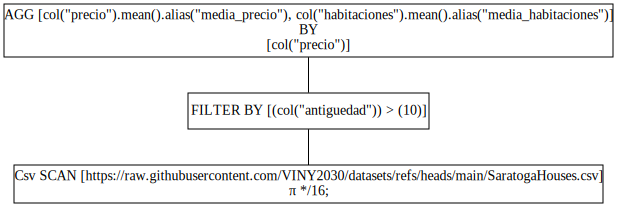

In [79]:
# Call show_graph before collect()
query.show_graph(optimized=False)

# then if you want a pandas DataFrame use collect()
result = query.collect()

###La visualización del plan de consulta debe leerse de abajo hacia arriba. Expliquemos como leer esta salida:

##Cada rectángulo corresponde a una etapa del plan de consulta
##El sigma significa SELECCIÓN e indica cualquier condición de filtro
##El pi significa PROYECCIÓN e indica la elección de un subconjunto de columnas

# Imprimir el plan de consulta
#También podemos imprimir el plan no optimizado con explain(optimized=False).

In [83]:
print(query.explain(optimized=False))

AGGREGATE
	[col("precio").mean().alias("media_precio"), col("habitaciones").mean().alias("media_habitaciones")] BY [col("precio")] FROM
  FILTER [(col("antiguedad")) > (10)] FROM
    Csv SCAN [https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv]
    PROJECT */16 COLUMNS


##Imprimamos el plan de consulta optimizado.

In [82]:
print(query.explain())

AGGREGATE
	[col("precio").mean().alias("media_precio"), col("habitaciones").mean().alias("media_habitaciones")] BY [col("precio")] FROM
  Csv SCAN [https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv]
  PROJECT 3/16 COLUMNS
  SELECTION: [(col("antiguedad")) > (10)]



# **<font color="#07a8ed">Ejecucion de una consulta en la  API lazy**

In [86]:
query = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .with_columns(antiguedad=(pl.col('antiguedad') > 60))
    .filter(pl.col('precio') > 50000) # Use pl.col here for consistency
)

##Podemos ejecutar nuestra consulta en el conjunto de datos completo llamando al método .collect en la consulta.

In [88]:
query.collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,bool,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,false,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,false,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,true,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,false,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,false,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,false,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,false,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,false,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [87]:
query

###Con el método por defecto collect, Polars procesa todos sus datos como un solo lote. Esto significa que todos los datos deben caber en la memoria disponible en el punto de mayor uso de la memoria en la consulta.


# **<font color="#07a8ed">Ejecución en datos más grandes que la memoria**


##Si nuestros datos requieren más memoria de la que tenemos disponible, es posible que Polars pueda procesar los datos en lotes (batches en inglés) utilizando el modo de streaming. Para usar el modo streaming simplemente pasamos el argumento streaming=True a collect.

In [91]:
query = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .with_columns(antiguedad=(pl.col('antiguedad') > 60))
    .filter(pl.col('precio') > 50000) # Use pl.col aqui para su consistencia
    .collect(streaming=True)
)

In [90]:
query

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,bool,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,false,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,false,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,true,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,false,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,false,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,false,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,false,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,false,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""



# **<font color="#07a8ed">Ejecución en un conjunto de datos parcial**

###Mientras escribimos, optimizamos o verificamos nuestra consulta en un conjunto de datos grande, consultar todos los datos disponibles puede provocar un proceso de desarrollo lento.

##En su lugar, podemos ejecutar la consulta con el método .fetch. El método .fetch toma un parámetro n_rows e intenta "obtener" (fetch) esa cantidad de filas en la fuente de datos. Sin embargo, no se puede garantizar el número de filas, ya que la API lazy no cuenta cuántas filas hay en cada etapa de la consulta.

In [93]:
query = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .with_columns(antiguedad=(pl.col('antiguedad') > 60))
    .filter(pl.col('precio') > 50000) # Use pl.col aqui para su consistencia

)
query.fetch(n_rows=20)

<ipython-input-93-a0d3ed8aaf1d>:7: DeprecationWarning: `LazyFrame.fetch` is deprecated. `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  query.fetch(n_rows=20)


,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,bool,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,false,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,false,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,true,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,false,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,false,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
15,89900,0.0,true,2500,936,57,3,1.0,4,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
16,155000,0.13,false,300,1300,41,3,1.5,7,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
17,253750,2.0,false,49800,2816,71,4,2.5,12,"""hot air""","""gas""","""none""","""No""","""No""","""Yes"""



# **<font color="#07a8ed">Lazy Frames Agregaciones**

In [94]:
import polars as pl

lf = pl.LazyFrame(
    {
        'id': [1,2,3],
        'nombre': ['Jose', 'Ana', 'Rosa']
    }
)

lf

##Si tratamos de mostar el LazyFrame como se muestra en la celda previa lo que obtendremos es una representación visual del plan de ejecución.

###Por tanto si deseamos mostrar el LazyFrame debemos convertirlo a un DataFrame con la función collect y luego mostrarlo.

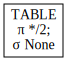

In [96]:
lf.show_graph()

In [95]:
lf.collect()

id,nombre
i64,str
1,"""Jose"""
2,"""Ana"""
3,"""Rosa"""


# **null_count**
###Esta función retorna el conteo de valores nulos de cada columna.

In [106]:
df = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
)
df

In [107]:
df.collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [108]:
df.null_count().collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
df.collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


# **sum**
###Esta función devuelve la suma de los valores de cada columna del DataFrame.

In [110]:
df.sum().collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
1492128,366278467,864.37,48239,59714820,3032598,96021,5451,3283.5,12168,null,null,null,null,null,null


# ***min, max y mean***
##Esta funciones se comportan igual en un DataFrame o un LazyFrame.

In [111]:
df.min()

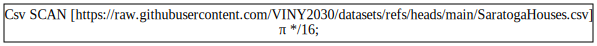

In [112]:
df.show_graph()

In [113]:
df.min().collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,5000,0.0,0,200,616,20,1,0.0,2,"""electric""","""electric""","""none""","""No""","""No""","""No"""


In [114]:
df.max().collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
1727,775000,12.2,225,412600,5228,82,7,4.5,12,"""hot water/steam""","""oil""","""septic""","""Yes""","""Yes""","""Yes"""


In [115]:
df.mean().collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str
863.5,211966.70544,0.500214,27.916088,34557.1875,1754.975694,55.567708,3.154514,1.900174,7.041667,null,null,null,null,null,null



# **<font color="#07a8ed">Lazy Frames Atributos**

# columns
##Esta función realiza exactamente la misma función en un DataFrame que en un LazyFrame, devuelve una lista con los nombres de columna.

In [117]:
df.columns

<ipython-input-117-b666bf274d0a>:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  df.columns


['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

In [118]:
df.collect_schema().names()

['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

# **dtypes**
##Esta función devuelve los tipos de datos de las columnas de un LazyFrame.

In [120]:
df.dtypes

<ipython-input-120-5cc0934cc03c>:1: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  df.dtypes


[Int64,
 Int64,
 Float64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Float64,
 Int64,
 String,
 String,
 String,
 String,
 String,
 String]

In [121]:
df.collect_schema().dtypes()

[Int64,
 Int64,
 Float64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Float64,
 Int64,
 String,
 String,
 String,
 String,
 String,
 String]

# **schema**
##Esta función devuelve el schema de un LazyFrame en un diccionario donde las llaves son los nombres de columnas y los valores son los tipos de datos de esa columna.

In [124]:
df.collect_schema()

Schema([('', Int64),
        ('precio', Int64),
        ('metros_totales', Float64),
        ('antiguedad', Int64),
        ('precio_terreno', Int64),
        ('metros_habitables', Int64),
        ('universitarios', Int64),
        ('dormitorios', Int64),
        ('baños', Float64),
        ('habitaciones', Int64),
        ('calefaccion', String),
        ('consumo_calefacion', String),
        ('desague', String),
        ('vistas_lago', String),
        ('nueva_construccion', String),
        ('aire_acondicionado', String)])

In [127]:
df.schema.get('precio')

<ipython-input-127-34bc43f0a357>:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  df.schema.get('precio')


Int64

# **width**
##Esta función devuelve el número de columnas de un LazyFrame.

In [128]:
df.width

<ipython-input-128-6fdd511ee95f>:1: PerformanceWarning: Determining the width of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().len()` to get the width without this warning.
  df.width


16

In [129]:
df.collect_schema().len()

16


# **<font color="#07a8ed">Lazy Frames Group_by**

# **Varias agregaciones**
##Para realizar agregaciones sobre un LazyFrame primero debemos realizar un agrupado con la función group_by y luego utilizar la función agg.

##Las agregaciones funcionan de de la misma forma a como lo estudiamos en la lección de GroupBy de los DataFrame de Polars.

In [130]:
df.collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [149]:
df.group_by('precio').agg(
    col('precio').mean().alias(name.suffix('_mean')),
    (col('dormitorios').count()).alias('conteo_dormitorios'),
    (col('antiguedad').sum()).alias('suma_antiguedad'),
    (col('antiguedad').min()).alias('min_antiguedad'),
    (col('antiguedad').max()).alias('max_antiguedad'),
    (col('antiguedad').first()).alias('primer_antiguedad'),
    (col('antiguedad').last()).alias('ultimo_antiguedad'),
    (col('antiguedad').last() - col('antiguedad').first()).alias('diferencia_antiguedad')
).collect()


NameError: name 'name' is not defined

In [132]:
df.collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""



# **<font color="#07a8ed">Lazy Frames-Manipulacion y Seleccion**

##Debemos tener en cuenta que estas operaciones funcionan de la misma forma a como lo hacen con los DataFrame con algunas excepciones.

# **botton_k**
##Retorna los k elementos más pequeños del DataFrame. Le podemos indicar la cantidad de elementos que deseamos mostrar y por cual columna ordenar para obtener el resultado.

In [135]:
# Now sort by 'antiguedad' in descending order, placing nulls last.
result = df.sort(by=['antiguedad'], descending=[True], nulls_last=True)
result

In [136]:
result.collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
62,82800,0.11,225,3900,1483,52,3,1.0,7,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""
33,227000,1.8,201,25500,1876,52,3,2.5,5,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
140,135000,3.0,178,44500,3020,41,4,2.5,12,"""hot water/steam""","""oil""","""septic""","""No""","""No""","""No"""
1685,422680,0.16,176,46200,4486,51,6,4.0,12,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
980,154000,0.1,174,32800,1364,63,5,1.0,9,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1468,295925,0.56,0,108900,2134,40,4,2.5,9,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""No"""
1484,355063,0.36,0,13000,2256,64,4,2.5,8,"""hot air""","""gas""","""septic""","""No""","""Yes""","""Yes"""
1588,365000,0.56,0,37900,2950,64,4,2.5,12,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


# **drop**
##Elimina la(s) columna(s) seleccionada(s).

In [137]:
df.drop('nueva_construccion').collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No"""


In [140]:
df.collect_schema().names()

['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

In [142]:
###df = df.drop('nueva_construccion').collect()

# **Filtrar un DataFrame**

In [155]:
df.filter(pl.col('precio') > 0).filter((pl.col('antiguedad')>10) & (pl.col('precio')>50000)).select(
    [
        pl.col('precio').mean().alias('precio_mean'),
        pl.col('dormitorios').count().alias('conteo_dormitorios'),
        pl.col('antiguedad').sum().alias('suma_antiguedad'),
        pl.col('antiguedad').min().alias('min_antiguedad'),
        pl.col('antiguedad').max().alias('max_antiguedad'),
        pl.col('antiguedad').first().alias('primer_antiguedad'),
        pl.col('antiguedad').last().alias('ultimo_antiguedad'),
        (pl.col('antiguedad').last() - pl.col('antiguedad').first()).alias('diferencia_antiguedad')
    ]
).collect()


precio_mean,conteo_dormitorios,suma_antiguedad,min_antiguedad,max_antiguedad,primer_antiguedad,ultimo_antiguedad,diferencia_antiguedad
f64,u32,i64,i64,i64,i64,i64,i64
193701.342899,1359,46559,11,225,42,86,44


## ***with_context***
##Esta función agrega un contexto externo al gráfico de cálculo. Esto permite que las expresiones también accedan a columnas de DataFrames que no forman parte de este.

In [156]:
tarjetas_lz = pl.LazyFrame({'tarjeta': ['bronce', 'plata', 'oro']})

descuentos_lz = pl.LazyFrame({'descuento': [10, 20, 30]})

tarjetas_lz.with_context(descuentos_lz).select(
    col('tarjeta'),
    col('descuento')
).collect()

<ipython-input-156-19a32257313a>:5: DeprecationWarning: `LazyFrame.with_context` is deprecated. Use `pl.concat(..., how='horizontal')` instead.
  tarjetas_lz.with_context(descuentos_lz).select(


tarjeta,descuento
str,i64
"""bronce""",10
"""plata""",20
"""oro""",30


# **slice**
##Con esta función podemos obtener una porción o lo que en inglés se conoce como un slice de un DataFrame.

In [158]:
df.slice(1,10).collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
5,120000,0.68,31,14000,1152,22,4,1.0,8,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
6,153000,0.4,33,23300,2752,51,4,1.5,8,"""hot water/steam""","""oil""","""septic""","""No""","""No""","""No"""
7,170000,1.21,23,14600,1662,35,4,1.5,9,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
8,90000,0.83,36,22200,1632,51,3,1.5,8,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
9,122900,1.94,4,21200,1416,44,3,1.5,6,"""hot air""","""gas""","""none""","""No""","""No""","""No"""


# **sort**
##Esta función ordena el LazyFrame por la(s) columna(s) proporcionadas

In [159]:
df.sort('antiguedad', descending=True, nulls_last=True).collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
62,82800,0.11,225,3900,1483,52,3,1.0,7,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""
33,227000,1.8,201,25500,1876,52,3,2.5,5,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
140,135000,3.0,178,44500,3020,41,4,2.5,12,"""hot water/steam""","""oil""","""septic""","""No""","""No""","""No"""
1685,422680,0.16,176,46200,4486,51,6,4.0,12,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
980,154000,0.1,174,32800,1364,63,5,1.0,9,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1468,295925,0.56,0,108900,2134,40,4,2.5,9,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""No"""
1484,355063,0.36,0,13000,2256,64,4,2.5,8,"""hot air""","""gas""","""septic""","""No""","""Yes""","""Yes"""
1588,365000,0.56,0,37900,2950,64,4,2.5,12,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


# **gather_every**
##Toma cada enésima fila del LazyFrame y regresa un nuevo LazyFrame. El primer parámetro estable cada cuantas filas queremos tomar la siguiente fila y el parámetro offset establece desde que posición queremos iniciar a tomar las filas.

In [160]:
df.gather_every(5, 100).collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
100,110000,0.59,10,3100,936,44,3,1.0,6,"""hot air""","""gas""","""septic""","""No""","""No""","""Yes"""
105,225000,2.37,8,3300,1784,44,3,2.0,6,"""hot water/steam""","""oil""","""septic""","""No""","""No""","""No"""
110,112500,0.72,43,4600,1232,44,3,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
115,192000,0.82,0,5000,1880,44,3,2.5,9,"""hot air""","""gas""","""septic""","""No""","""Yes""","""Yes"""
120,75000,1.0,45,8000,1008,44,3,1.0,7,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1705,221450,0.36,121,33000,2699,61,6,1.0,12,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
1710,388000,0.77,9,74400,2762,61,4,2.5,12,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""
1715,70000,1.34,34,36700,1313,61,2,1.5,3,"""electric""","""electric""","""septic""","""No""","""No""","""No"""


# **shift**
##Esta función cambia los valores según el número dado de índices. En la práctica lo podemos ver como un desplazamiento de las filas del LazyFrame.

In [161]:
df.shift(3).collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1720,436023,0.41,5,43400,2718,61,4,2.5,12,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""Yes"""
1721,319900,0.58,42,31400,2464,61,4,2.5,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1722,249000,0.43,41,45800,2426,61,4,2.0,7,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [162]:
df.shift(3, fill_value='prueba').collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba"""
"""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba"""
"""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba"""
"""0""","""132500""","""0.09""","""42""","""50000""","""906""","""35""","""2""","""1.0""","""5""","""electric""","""electric""","""septic""","""No""","""No""","""No"""
"""1""","""181115""","""0.92""","""0""","""22300""","""1953""","""51""","""3""","""2.5""","""6""","""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""1720""","""436023""","""0.41""","""5""","""43400""","""2718""","""61""","""4""","""2.5""","""12""","""hot air""","""gas""","""public/commercial""","""No""","""No""","""Yes"""
"""1721""","""319900""","""0.58""","""42""","""31400""","""2464""","""61""","""4""","""2.5""","""8""","""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
"""1722""","""249000""","""0.43""","""41""","""45800""","""2426""","""61""","""4""","""2.0""","""7""","""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""


# **inspect**
##Esta función inspecciona un nodo en el gráfico de cálculo. Con ella podemos imprimir el valor que evalúa este nodo en el gráfico de cálculo.

In [163]:
query_inspect = (
    df.with_columns(precio=(pl.col('precio') > 60000))
    .inspect()
    .select(
        col('antiguedad'),
        col('precio')
    )
)

In [164]:
query_inspect.collect()

shape: (1_728, 2)
┌────────┬────────────┐
│ precio ┆ antiguedad │
│ ---    ┆ ---        │
│ bool   ┆ i64        │
╞════════╪════════════╡
│ true   ┆ 42         │
│ true   ┆ 0          │
│ true   ┆ 133        │
│ true   ┆ 13         │
│ true   ┆ 0          │
│ …      ┆ …          │
│ true   ┆ 32         │
│ true   ┆ 37         │
│ true   ┆ 9          │
│ true   ┆ 48         │
│ true   ┆ 86         │
└────────┴────────────┘


antiguedad,precio
i64,bool
42,true
0,true
133,true
13,true
0,true
…,…
32,true
37,true
9,true


In [165]:
print(query_inspect.explain())

simple π 2/2 ["antiguedad", "precio"]
  OPAQUE_PYTHON
     WITH_COLUMNS:
     [[(col("precio")) > (60000)].alias("precio")] 
      Csv SCAN [https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv]
      PROJECT 2/16 COLUMNS



# **<font color="#07a8ed">Lazy Frames-Miscelanea**

# **map_batches**
##Esta función permite aplicar una función personalizada a un LazyFrame. Es importante que la función personalizada devuelva un DataFrame de Polars.

In [174]:
(
 df.select(
  col('antiguedad'),
  col('precio')
 )
 .map_batches(lambda c: (c / 60).cast(pl.Int32))
 # Use a dictionary to specify the desired data types for each column
 .with_columns([
        pl.col("antiguedad").cast(pl.Int32),  # Cast 'antiguedad' to Int64
        pl.col("precio").cast(pl.Int32)  # Cast 'precio' to Int64
    ])
).collect()

ComputeError: The output schema of 'LazyFrame.map' is incorrect. Expected: Schema:
name: antiguedad, field: Int64
name: precio, field: Int64

Got: Schema:
name: antiguedad, field: Int32
name: precio, field: Int32


In [172]:
(
 df.select(
  col('antiguedad'),
  col('precio')
 )
 .map_batches(lambda c: (c / 60).cast(pl.Int32))
 # Use a dictionary to specify the desired data types for each column
 .cast({"antiguedad": pl.col(int64), "precio": pl.col(int64)})
).collect()

NameError: name 'int64' is not defined

In [167]:
(
 df.select(
  col('antiguedad'),
  col('precio')
 )
 .map_batches(lambda c: (c / 60).cast(pl.Int32))
 # Add .cast to match the original schema
 .cast(pl.DataFrame({"antiguedad": pl.Int64, "precio": pl.Int64}))
 .collect()
)

TypeError: argument 'dtype': 'DataFrame' is not a Polars data type

In [166]:
(
       df.select(
        col('antiguedad'),
        col('precio')
    )
    .map_batches(lambda c: (c / 60).cast(pl.Int32))
    .collect()
)

ComputeError: The output schema of 'LazyFrame.map' is incorrect. Expected: Schema:
name: antiguedad, field: Int64
name: precio, field: Int64

Got: Schema:
name: antiguedad, field: Int32
name: precio, field: Int32


# pipe
##Esta función ofrece una forma estructurada de aplicar una secuencia de funciones definidas por el usuario (UDF).

In [175]:
def fill_null_int_str(df, col_name):

    if str(df_lazy.select(col_name).dtypes[0]) == 'String':

        return df.fill_null('LOST')

    else:

        return df.fill_null(-999)

In [177]:
df.pipe(fill_null_int_str, 'nombre', ).collect()

<ipython-input-175-253eb1067d0b>:3: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  if str(df_lazy.select(col_name).dtypes[0]) == 'String':


,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [178]:
df.collect_schema().dtypes()

[Int64,
 Int64,
 Float64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Float64,
 Int64,
 String,
 String,
 String,
 String,
 String,
 String]

# **profile**
##Esta función perfila un LazyFrame, es decir, ejecutará la consulta y devolverá una tupla que contiene el DataFrame materializado y un DataFrame que contiene información de perfil de cada nodo que se ejecuta. Las unidades de los tiempos son microsegundos.

##Con el parámetro show_plot=True mostraremos un diagrama de Gantt del resultado del perfilado.

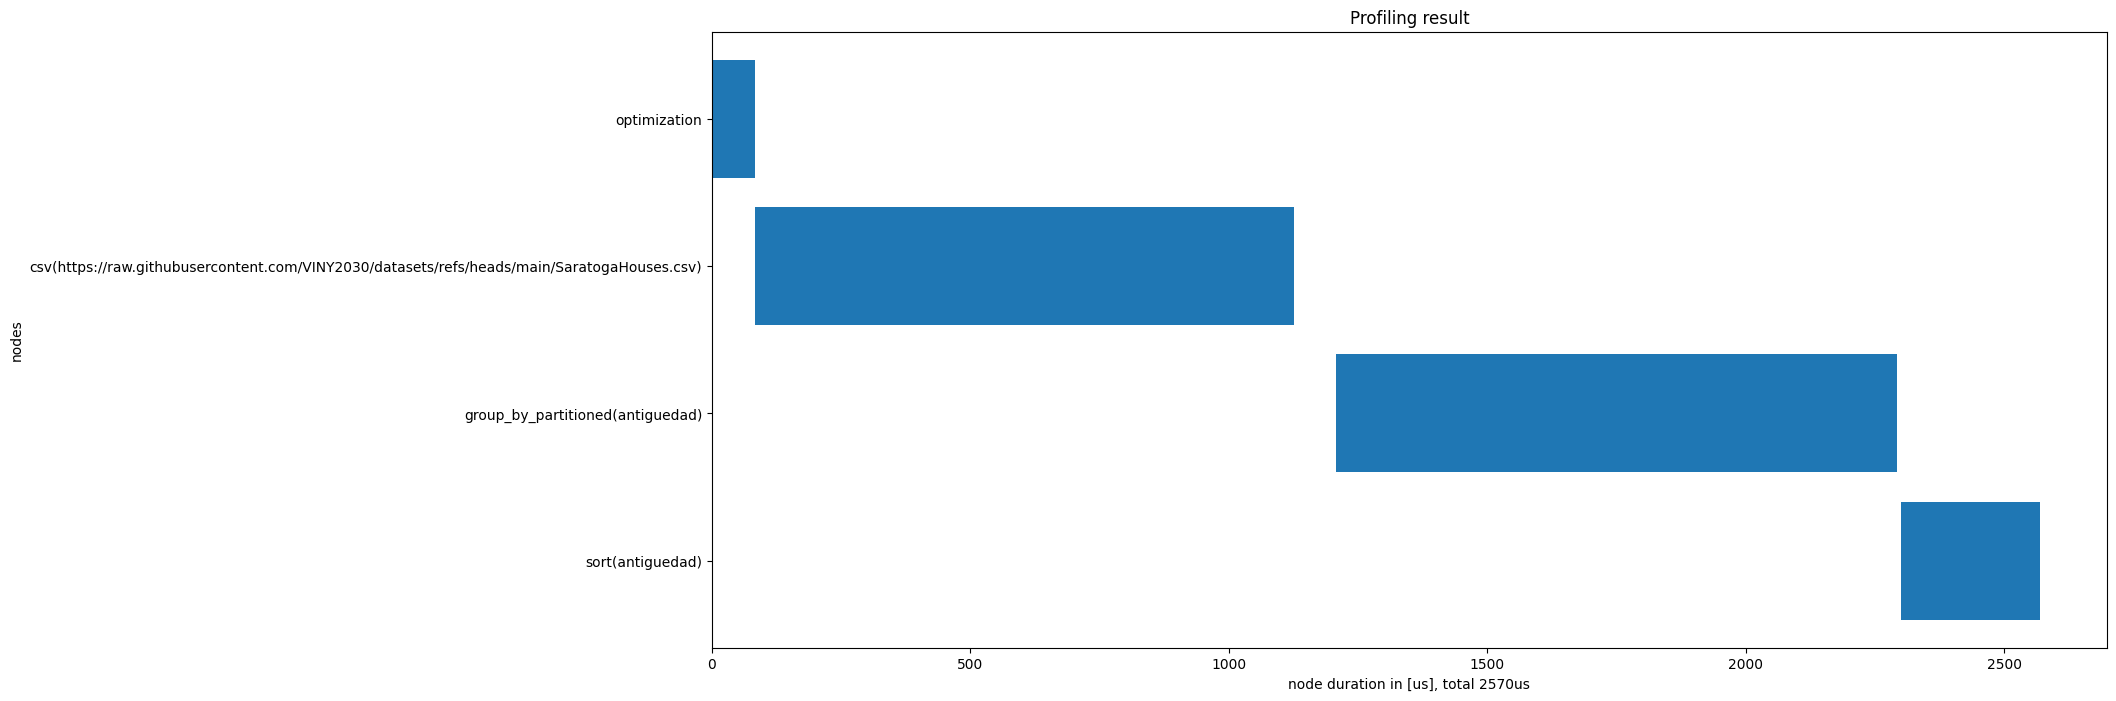

(shape: (136, 2)
 ┌────────────┬──────────────┐
 │ antiguedad ┆ suma_precios │
 │ ---        ┆ ---          │
 │ i64        ┆ i64          │
 ╞════════════╪══════════════╡
 │ 225        ┆ 82800        │
 │ 201        ┆ 227000       │
 │ 178        ┆ 135000       │
 │ 176        ┆ 422680       │
 │ 174        ┆ 154000       │
 │ …          ┆ …            │
 │ 4          ┆ 6271000      │
 │ 3          ┆ 9727250      │
 │ 2          ┆ 5642600      │
 │ 1          ┆ 22752834     │
 │ 0          ┆ 22221338     │
 └────────────┴──────────────┘,
 shape: (4, 3)
 ┌─────────────────────────────────┬───────┬──────┐
 │ node                            ┆ start ┆ end  │
 │ ---                             ┆ ---   ┆ ---  │
 │ str                             ┆ u64   ┆ u64  │
 ╞═════════════════════════════════╪═══════╪══════╡
 │ optimization                    ┆ 0     ┆ 83   │
 │ csv(https://raw.githubusercont… ┆ 83    ┆ 1126 │
 │ group_by_partitioned(antigueda… ┆ 1208  ┆ 2292 │
 │ sort(antiguedad)     

In [187]:
query_df = df.group_by('antiguedad').agg(
    suma_precios=col('precio').sum()
).sort('antiguedad', descending=True)

query_df.profile(show_plot=True)